In [1]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [4]:
df = pd.read_csv('E:\python_stat\data/ch2_scores_em.csv',
                    index_col='student number')

df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [12]:
scores_df = pd.DataFrame({'score' : scores},
                        index=pd.Index(['A','B','C','D','E',
                        'F','G','H','I','J'],
                        name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [17]:
np.mean(scores)

55.0

In [18]:
np.median(scores)

56.5

In [20]:
scores_df.mode()

,score
0,65


In [22]:
english_scores = np.array(df['english'])
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [24]:
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [26]:
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [30]:
freq_class = [f' {i} ~ {i+10} ' for i in range(0, 100, 10)]
freq_class

[' 0 ~ 10 ',
 ' 10 ~ 20 ',
 ' 20 ~ 30 ',
 ' 30 ~ 40 ',
 ' 40 ~ 50 ',
 ' 50 ~ 60 ',
 ' 60 ~ 70 ',
 ' 70 ~ 80 ',
 ' 80 ~ 90 ',
 ' 90 ~ 100 ']

In [31]:
pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))

,frequency
class,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


In [32]:
class_value = [(i+(i+10))/2 for i in range(0, 100, 10)]
class_value

[5.000, 15.000, 25.000, 35.000, 45.000, 55.000, 65.000, 75.000, 85.000, 95.000]

In [33]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [34]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline

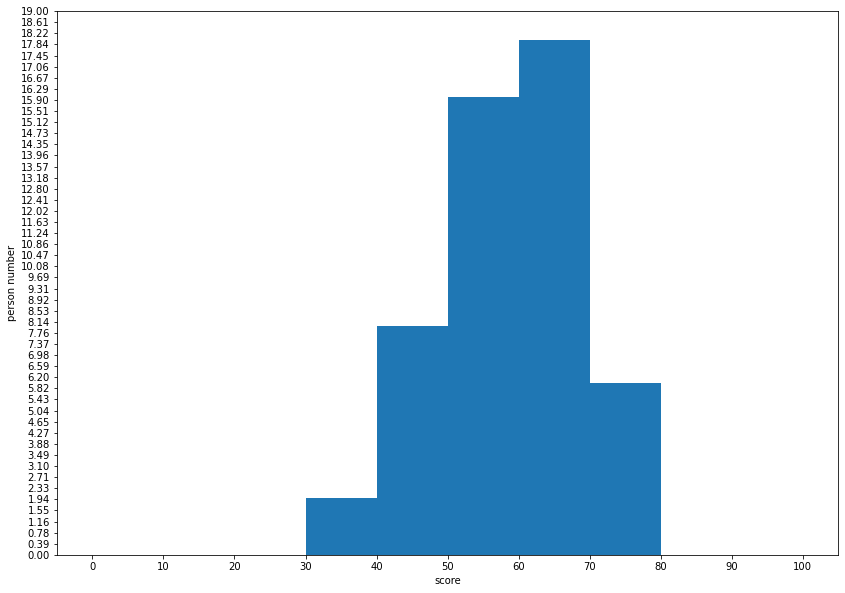

In [46]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.linspace(0, freq.max()+1))
plt.show()